# Cleaning Text

In [1]:
text = open("The Hindu", encoding = 'utf-8').read()

In [2]:
print(text)

The deaths in the last few days of at least 25 people in Bihar’s Gopalganj and West Champaran districts and five in Muzaffarpur apart from several others taking ill after consuming spurious liquor points to the unintended but not unexpected consequences of the total prohibition law that has been in effect in the State for more than five years. Hooch tragedies such as these are a consequence of the unregulated production and sale of liquor via the black market, and the use of illicit liquor as a substitute due to the lack of the sale of over-the-counter and regulated drinks. Prohibition as a policy has been shown up as inadequate to curb the problem of alcoholism and the havoc wreaked by it on households due to excessive consumption for a variety of reasons in State after State. In Bihar, implementation has not been without immense public support, especially among rural women. Yet, despite significant steps taken to enhance enforcement by officials from the excise department, the police

In [3]:
lower_case = text.lower()
print(lower_case)

the deaths in the last few days of at least 25 people in bihar’s gopalganj and west champaran districts and five in muzaffarpur apart from several others taking ill after consuming spurious liquor points to the unintended but not unexpected consequences of the total prohibition law that has been in effect in the state for more than five years. hooch tragedies such as these are a consequence of the unregulated production and sale of liquor via the black market, and the use of illicit liquor as a substitute due to the lack of the sale of over-the-counter and regulated drinks. prohibition as a policy has been shown up as inadequate to curb the problem of alcoholism and the havoc wreaked by it on households due to excessive consumption for a variety of reasons in state after state. in bihar, implementation has not been without immense public support, especially among rural women. yet, despite significant steps taken to enhance enforcement by officials from the excise department, the police

In [4]:
import string
from collections import Counter

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
clean_text = lower_case.translate(str.maketrans('','',string.punctuation))

In [7]:
print(clean_text)

the deaths in the last few days of at least 25 people in bihar’s gopalganj and west champaran districts and five in muzaffarpur apart from several others taking ill after consuming spurious liquor points to the unintended but not unexpected consequences of the total prohibition law that has been in effect in the state for more than five years hooch tragedies such as these are a consequence of the unregulated production and sale of liquor via the black market and the use of illicit liquor as a substitute due to the lack of the sale of overthecounter and regulated drinks prohibition as a policy has been shown up as inadequate to curb the problem of alcoholism and the havoc wreaked by it on households due to excessive consumption for a variety of reasons in state after state in bihar implementation has not been without immense public support especially among rural women yet despite significant steps taken to enhance enforcement by officials from the excise department the police and local 

# Tokenization and Stop Words

In [8]:
tokenized_words = word_tokenize(clean_text, "english")
#print(tokenized_words)

In [9]:
#stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
#              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
#              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
#              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
#              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
#              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
#              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
#              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
#              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
#              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [10]:
final_words = []

In [11]:
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [12]:
print(final_words)

['deaths', 'last', 'days', 'least', '25', 'people', 'bihar', '’', 'gopalganj', 'west', 'champaran', 'districts', 'five', 'muzaffarpur', 'apart', 'several', 'others', 'taking', 'ill', 'consuming', 'spurious', 'liquor', 'points', 'unintended', 'unexpected', 'consequences', 'total', 'prohibition', 'law', 'effect', 'state', 'five', 'years', 'hooch', 'tragedies', 'consequence', 'unregulated', 'production', 'sale', 'liquor', 'via', 'black', 'market', 'use', 'illicit', 'liquor', 'substitute', 'due', 'lack', 'sale', 'overthecounter', 'regulated', 'drinks', 'prohibition', 'policy', 'shown', 'inadequate', 'curb', 'problem', 'alcoholism', 'havoc', 'wreaked', 'households', 'due', 'excessive', 'consumption', 'variety', 'reasons', 'state', 'state', 'bihar', 'implementation', 'without', 'immense', 'public', 'support', 'especially', 'among', 'rural', 'women', 'yet', 'despite', 'significant', 'steps', 'taken', 'enhance', 'enforcement', 'officials', 'excise', 'department', 'police', 'local', 'administra

# Algorithm for Emotion and Text Analysis 

In [13]:
emotion_list = []

with open('Emotions', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',','').replace("'",'').strip()
        #print(clear_line)
        word, emotion = clear_line.split(':')
        #print("word: " +word+ ", " + "Emotion: " +emotion)
        
        if word in final_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)

[' obsessed', ' sad', ' esteemed', ' loved', ' sad']
Counter({' sad': 2, ' obsessed': 1, ' esteemed': 1, ' loved': 1})


In [14]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    neg = score["neg"]
    pos = score["pos"]
    if neg>pos:
        print("Negative Sentiment")
    elif pos>neg:
        print("Positive Sentiment")
    else:
        print("Neutral Vibe")
    
sentiment_analyse(clean_text)

Negative Sentiment


# Plotting the emotions on the graph

In [15]:
import matplotlib.pyplot as plt

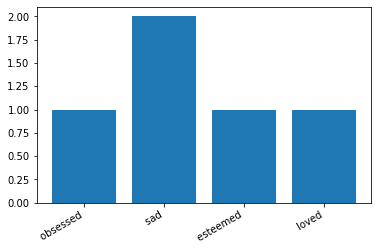

In [16]:
fig, axl = plt.subplots()
axl.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig("graph.png")
plt.show()